In [1]:
from IPython.display import Image 
Image('../../../python_for_probability_statistics_and_machine_learning.jpg')

The Bernoulli distribution we studied earlier answers the question of which of
two outcomes ($Y \in \lbrace 0,1 \rbrace$) would be selected with probability,
$p$.

$$
\mathbb{P}(Y) = p^Y (1-p)^{ 1-Y }
$$

 We also know how to solve the corresponding likelihood function for
the maximum likelihood estimate of $p$ given observations of the output,
$\lbrace Y_i \rbrace_{i=1}^n$. However, now we want to include other factors in
our estimate of $p$. For example, suppose we observe not just the outcomes, but
a corresponding continuous variable, $x$. That is, the observed data is now
$\lbrace (x_i,Y_i) \rbrace_{i=1}^n$  How can we incorporate $x$ into our
estimation of $p$?

The most straightforward idea is to model $p= a x + b$ where $a,b$ are
parameters of a fitted line. However, because $p$ is a probability with value
bounded between zero and one, we need to wrap this estimate in another function
that can map the entire real line into the $[0,1]$ interval. The logistic
(a.k.a. sigmoid) function has this property,

$$
\theta(s) = \frac{e^s}{1+e^s}
$$

 Thus, the new parameterized estimate for $p$ is the following,

<!-- Equation labels as ordinary links -->
<div id="eq:prob"></div>

$$
\begin{equation}
\hat{p} = \theta(a x+b)= \frac{e^{a x + b}}{1+e^{a x + b}}
\label{eq:prob} \tag{1}
\end{equation}
$$

 This is usually expressed using the *logit* function,

$$
\texttt{logit}(t)= \log \frac{t}{1-t}
$$

 as,

$$
\texttt{logit}(p) = b + a x
$$

 More continuous variables can be accommodated easily as

$$
\texttt{logit}(p) = b + \sum_k a_k x_k
$$

 This can be further extended beyond the binary case to multiple
target labels. The maximum likelihood estimate of this uses
numerical optimization methods that are implemented in Scikit-learn.

Let's construct some data to see how this works. In the following, we assign
class labels to a set of randomly scattered points in the two-dimensional
plane,

In [11]:
%matplotlib inline

import numpy as np
from matplotlib.pylab import subplots
v = 0.9
@np.vectorize
def gen_y(x):
    if x<5: return np.random.choice([0,1],p=[v,1-v]) 
    else:   return np.random.choice([0,1],p=[1-v,v])

xi = np.sort(np.random.rand(500)*10)
yi = gen_y(xi)

**Programming Tip.**

The `np.vectorize` decorator used in the code above makes it easy to avoid
looping in code that uses Numpy arrays by embedding the looping semantics
inside of the so-decorated function. Note, however, that this does not
necessarily accelerate the wrapped function. It's mainly for convenience.



[Figure](#fig:logreg_001) shows a scatter plot of the data we constructed in
the above code, $\lbrace (x_i,Y_i) \rbrace$. As constructed, it is more
likely that large values of $x$ correspond to $Y=1$. On the other hand, values
of $x \in [4,6]$ of either category are heavily overlapped. This means that $x$
is not a particularly strong indicator of $Y$ in this region.
[Figure](#fig:logreg_002) shows the fitted logistic regression curve against the
same
data. The points along the curve are the probabilities that each point lies in
either of the two categories. For large values of $x$ the curve is near one,
meaning that the probability that the associated $Y$ value is equal to one. On
the other extreme, small values of $x$ mean that this probability is close to
zero.  Because there are only two possible categories, this means that the
probability of $Y=0$ is thereby higher. The region in the middle corresponding
to the middle probabilities reflect the ambiguity between the two catagories
because of the overlap in the data for this region. Thus, logistic regression
cannot make a strong case for one category here.
The following code fits the logistic regression model,

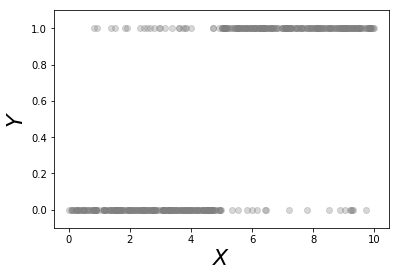

In [12]:
fig,ax=subplots()
_=ax.plot(xi,yi,'o',color='gray',alpha=.3)
_=ax.axis(ymax=1.1,ymin=-0.1)
_=ax.set_xlabel(r'$X$',fontsize=22)
_=ax.set_ylabel(r'$Y$',fontsize=22)

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(np.c_[xi],yi)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

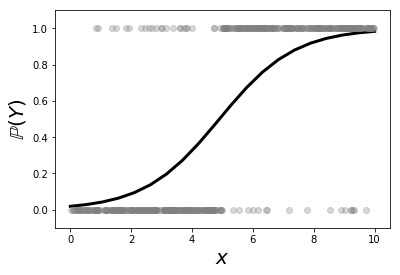

In [14]:
fig,ax=subplots()
xii=np.linspace(0,10,20)
_=ax.plot(xii,lr.predict_proba(np.c_[xii])[:,1],'k-',lw=3)
_=ax.plot(xi,yi,'o',color='gray',alpha=.3)
_=ax.axis(ymax=1.1,ymin=-0.1)
_=ax.set_xlabel(r'$x$',fontsize=20)
_=ax.set_ylabel(r'$\mathbb{P}(Y)$',fontsize=20)

<!-- dom:FIGURE: [fig-machine_learning/logreg_001.png, width=500 frac=0.75]
This scatterplot shows the binary $Y$ variables and the corresponding $x$ data
for each category. <div id="fig:logreg_001"></div> -->
<!-- begin figure -->
<div id="fig:logreg_001"></div>

<p>This scatterplot shows the binary $Y$ variables and the corresponding $x$
data for each category.</p>
<img src="fig-machine_learning/logreg_001.png" width=500>

<!-- end figure -->


<!-- dom:FIGURE: [fig-machine_learning/logreg_002.png, width=500 frac=0.75]
This shows the fitted logistic regression on the data shown in
[Figure](#fig:logreg_001). The points along the curve are the probabilities that
each point lies in either of the two categories.  <div
id="fig:logreg_002"></div> -->
<!-- begin figure -->
<div id="fig:logreg_002"></div>

<p>This shows the fitted logistic regression on the data shown in
[Figure](#fig:logreg_001). The points along the curve are the probabilities that
each point lies in either of the two categories.</p>
<img src="fig-machine_learning/logreg_002.png" width=500>

<!-- end figure -->


For a deeper understanding of logistic regression, we need to alter our
notation slightly and once again use our projection methods. More generally we
can rewrite Equation [eq:prob](#eq:prob) as the following,

<!-- Equation labels as ordinary links -->
<div id="eq:probbeta"></div>

$$
\begin{equation}
p(\mathbf{x}) = \frac{1}{1+\exp(-\boldsymbol{\beta}^T \mathbf{x})}
\label{eq:probbeta} \tag{2}
\end{equation}
$$

 where $\boldsymbol{\beta}, \mathbf{x}\in \mathbb{R}^n$.  From our
prior work on projection we know that the signed perpendicular distance between
$\mathbf{x}$ and the linear boundary described by $\boldsymbol{\beta}$ is
$\boldsymbol{\beta}^T \mathbf{x}/\Vert\boldsymbol{\beta}\Vert$.  This means
that the probability that is assigned to any point in $\mathbb{R}^n$ is a
function of how close that point is to the linear boundary described by the
following equation,

$$
\boldsymbol{\beta}^T \mathbf{x} = 0
$$

 But there is something subtle hiding here. Note that
for any $\alpha\in\mathbb{R}$,

$$
\alpha\boldsymbol{\beta}^T \mathbf{x} = 0
$$

 describes the *same* hyperplane. This means that we can multiply
$\boldsymbol{\beta}$ by an arbitrary scalar and still get the same geometry.
However, because of $\exp(-\alpha\boldsymbol{\beta}^T \mathbf{x})$ in Equation
[eq:probbeta](#eq:probbeta), this scaling determines the intensity of the
probability
attributed to $\mathbf{x}$. This is illustrated in [Figure](#fig:logreg_003).
The panel on the left shows two categories (squares/circles) split by the
dotted line that is determined by $\boldsymbol{\beta}^T\mathbf{x}=0$. The
background colors shows the probabilities assigned to points in the plane.  The
right panel shows that by scaling with $\alpha$, we can increase the
probabilities of class membership for the given points, given the exact same
geometry. The points near the boundary have lower probabilities because they
could easily be on the opposite side.  However, by scaling by $\alpha$, we can
raise those probabilities to any desired level at the cost of driving the
points further from the boundary closer to one. Why is this a problem? By
driving the probabilities arbitrarily using $\alpha$, we can overemphasize the
training set at the cost of out-of-sample data. That is, we may wind up
insisting on emphatic class membership of yet unseen points that are close to
the boundary that otherwise would have more equivocal probabilities (say, near
$1/2$).  Once again, this is another manifestation of bias/variance trade-off.

<!-- dom:FIGURE: [fig-machine_learning/logreg_003.png, width=500 frac=1.25]
Scaling can arbitrarily increase the probabilities of points near the decision
boundary.   <div id="fig:logreg_003"></div> -->
<!-- begin figure -->
<div id="fig:logreg_003"></div>

<p>Scaling can arbitrarily increase the probabilities of points near the
decision boundary.</p>
<img src="fig-machine_learning/logreg_003.png" width=500>

<!-- end figure -->


Regularization is a method that controls this effect by penalizing the size of
$\beta$ as part of its solution. Algorithmically, logistic regression works by
iteratively solving a sequence of weighted least squares problems. Regression
adds a $\Vert\boldsymbol{\beta}\Vert/C$ term to the least squares error. To see
this in action, let's create some data from a logistic regression and see if we
can recover it using Scikit-learn. Let's start with a scatter of points in the
two-dimensional  plane,

In [15]:
x0,x1=np.random.rand(2,20)*6-3
X = np.c_[x0,x1,x1*0+1] # stack as columns

Note that `X` has a third column of all ones. This is a
trick to allow the corresponding line to be offset from the origin
in the two-dimensional plane. Next, we create a linear boundary
and assign the class probabilities according to proximity to the
boundary.

In [16]:
beta = np.array([1,-1,1]) # last coordinate for affine offset
prd = X.dot(beta)
probs = 1/(1+np.exp(-prd/np.linalg.norm(beta)))
c = (prd>0) # boolean array class labels

This establishes the training data.  The next block
creates the logistic regression object and fits the data.

In [17]:
lr = LogisticRegression()
_=lr.fit(X[:,:-1],c)

Note that we have to omit the third dimension because of
how Scikit-learn internally breaks down the components of the
boundary. The resulting code extracts the corresponding
$\boldsymbol{\beta}$ from the `LogisticRegression` object.

In [18]:
betah = np.r_[lr.coef_.flat,lr.intercept_]

**Programming Tip.**

The Numpy `np.r_`  object provides a quick way to stack Numpy
arrays horizontally instead of using `np.hstack`.



 The resulting boundary is shown in the left panel in
[Figure](#fig:logreg_004). The crosses and triangles represent the two classes
we
created above, along with the separating gray line.  The logistic regression
fit produces the dotted black line. The dark circle is the point that logistic
regression categorizes incorrectly. The regularization parameter is $C=1$ by
default. Next, we can change the strength of the regularization parameter as in
the following,

In [19]:
lr = LogisticRegression(C=1000)

and the re-fit the data to produce the right panel in
[Figure](#fig:logreg_004). By increasing the regularization
parameter, we essentially nudged the fitting algorithm to
*believe* the data more than the general model. That is, by doing
this we accepted more variance in exchange for better bias.

<!-- dom:FIGURE: [fig-machine_learning/logreg_004.png, width=500 frac=1.25]  The
left panel shows the resulting boundary (dashed line) with $C=1$ as the
regularization parameter. The right panel is for $C=1000$. The gray line is the
boundary used to assign the class membership for the synthetic data. The dark
circle is the point that logistic regression categorizes incorrectly. <div
id="fig:logreg_004"></div> -->
<!-- begin figure -->
<div id="fig:logreg_004"></div>

<p>The left panel shows the resulting boundary (dashed line) with $C=1$ as the
regularization parameter. The right panel is for $C=1000$. The gray line is the
boundary used to assign the class membership for the synthetic data. The dark
circle is the point that logistic regression categorizes incorrectly.</p>
<img src="fig-machine_learning/logreg_004.png" width=500>

<!-- end figure -->


## Generalized Linear Models

Logistic regression is one example of a wider class of generalized linear
models that embed non-linear transformations in the fitting process. Let's back
up and break down logistic regression into smaller parts. As usual, we want to
estimate the conditional expectation $\mathbb{E}(Y\vert X=\mathbf{x})$.  For
plain linear regression, we have the following approximation,

$$
\mathbb{E}(Y\vert X=\mathbf{x})\approx\boldsymbol{\beta}^T\mathbf{x}
$$

 For notation sake, we call $r(x):=\mathbb{E}(Y\vert X=\mathbf{x})$
the response. For logistic regression, because $Y\in\left\{0,1\right\}$, we
have $\mathbb{E}(Y\vert X=\mathbf{x})=\mathbb{P}(Y\vert X=\mathbf{x})$ and the
transformation makes $r(\mathbf{x})$ linear.

$$
\begin{align*}
\eta(\mathbf{x}) &= \boldsymbol{\beta}^T\mathbf{x}     \\\
        &= \log \frac{r(\mathbf{x})}{1-r(\mathbf{x})}  \\\
        &= g(r(\mathbf{x}))
\end{align*}
$$

 where $g$ is defined as the logistic *link* function.
The $\eta(x)$ function is the linear predictor. Now that we have
transformed the original data space using the logistic function to
create the setting for the linear predictor, why don't we just do
the same thing for the $Y_i$ data? That is, for plain linear
regression, we usually take data, $\left\{X_i,Y_i\right\}$ and
then use it to fit an approximation to $\mathbb{E}(Y\vert X=x)$.
If we are transforming the conditional expectation using the
logarithm, which we are approximating using $Y_i$, then why don't
we correspondingly transform the binary $Y_i$ data? The answer is
that if we did so then we would get the logarithm of zero (i.e.,
infinity) or one (i.e., zero), which is not workable. The
alternative is to use a linear Taylor approximation, like we did
earlier with the delta method, to expand the $g$ function around
$r(x)$, as in the following,

$$
\begin{align*}
g(Y) &\approx \log\frac{r(x)}{1-r(x)} + \frac{Y-r(x)}{r(x)-r(x)^2} \\\
     &= \eta(x)+ \frac{Y-r(x)}{r(x)-r(x)^2}
\end{align*}
$$

 The interesting part is the $Y-r(x)$ term, because this is where the
class label data enters the problem. The expectation $\mathbb{E}(Y-r(x)\vert
X)=0$ so we can think of this differential as additive noise that dithers
$\eta(x)$. The variance of $g(Y)$ is the following,

$$
\begin{align*}
\mathbb{V}(g(Y)\vert X)&= \mathbb{V}(\eta(x)\vert X)+\frac{1}{(r(x)(1-r(x)))^2}
\mathbb{V}(Y-r(x)\vert X) \\\
                       &=\frac{1}{(r(x)(1-r(x)))^2} \mathbb{V}(Y-r(x)\vert X)
\end{align*}
$$

 Note that $\mathbb{V}(Y\vert X)=r(x)(1-r(x))$ because $Y$ is
a binary variable. Ultimately, this boils down to the following,

$$
\mathbb{V}(g(Y)\vert X)=\frac{1}{r(x)(1-r(x))}
$$

 Note that the variance is a function of $x$, which means it is
*heteroskedastic*, meaning that the iterative minimum-variance-finding
algorithm that computes $\boldsymbol{\beta}$ downplays $x$ where $r(x)\approx
0$ and $r(x)\approx 1$ because the peak of the variance occurs where
$r(x)\approx 0.5$, which are those equivocal points are close to the boundary.


For generalized linear models, the above sequence is the same and consists of
three primary ingredients: the linear predictor ($\eta(x)$), the link function
($g(x)$), and the *dispersion scale function*, $V_{ds}$ such that
$\mathbb{V}(Y\vert X)=\sigma^2 V_{ds}(r(x))$. For logistic regression, we have
$V_{ds}(r(x))=r(x)(1-r(x))$ and $\sigma^2=1$. Note that absolute knowledge of
$\sigma^2$ is not important because the iterative algorithm needs only a
relative proportional scale. To sum up, the iterative algorithm takes a linear
prediction for $\eta(x_i)$, computes the transformed responses, $g(Y_i)$,
calculates the weights $w_i=\left[(g^\prime(r(x_i))V_{ds}(r(x_i)))
\right]^{-1}$, and then does a weighted linear regression of $g(y_i)$ onto
$x_i$ with the weights $w_i$ to compute the next $\boldsymbol{\beta}$.
More details can be found in the following [[fox2015applied]](#fox2015applied),
[[lindsey1997applying]](#lindsey1997applying),
[[campbell2009generalized]](#campbell2009generalized).


<!-- # *Applied Predictive Modeling by Kuhn*, p. 283, -->
<!-- # Logit function, odds ratio -->
<!-- # *generalized linear models by Rodriguez*, p.72 -->
<!-- # *Scikit-learn cookbook*, p.78 -->